# 타이타닉 생존자 예측을 위한 EDA(Exploratory Data Analysis) - 탐색적 데이터 분석

## 작업 순서
1. 필요한 라이브러리 고민
2. 한국어 설정
3. 데이터를 DataFrame으로 바꾸기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한국어 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
import seaborn as sns
df = sns.load_dataset("titanic") # 결과는 Pandas DataFrameset으로 줌.
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info() # 문자열을 숫자열로 바꿔야 함. -> 머신러닝은 다 숫자로 처리하기 때문. -> object를 숫자Type으로 바꿀 생각해야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [43]:
missing_values = df.isnull().sum()
missing_values
missing_percent = (missing_values / len(df)) * 100
missing_percent

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [6]:
# TODO:  Pandas 경고 수정
## df['age'] --> SELECT agr from df
# df["age"].fillna(df["age"].mean(), inplace=True)
df["age"] = df["age"].fillna(df["age"].mean())

In [5]:
# embarked object 문자열 Type은 어떻게 채울까? 문자열에 평균도 없고.. 가장 빈도가 많은 승선소로 
# df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df["embarked"].isnull().sum()

np.int64(0)

## 생존자 현황

In [10]:
survived_count =  df["survived"].value_counts()
survived_rate = df["survived"].mean()
print(f"생존자: {survived_count[1]}명")
print(f"사망자: {survived_count[0]}명")
print(f"생존율: {survived_rate:.2%}")



생존자: 342명
사망자: 549명
생존율: 38.38%


survived,0,1
sex,,
female,81,233
male,468,109


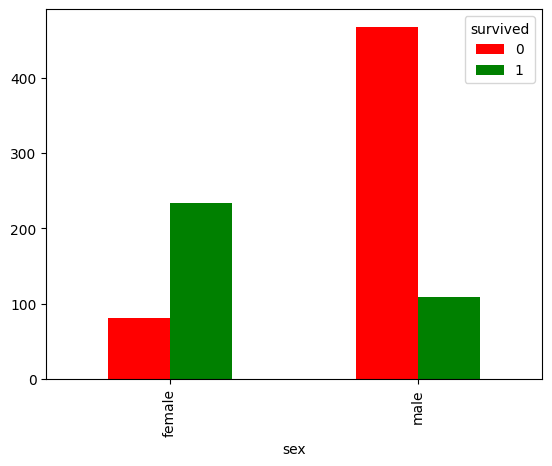

In [16]:
# 카타시안 곱
gender_survival_counts = pd.crosstab(df["sex"], df["survived"])
gender_survival_counts.plot(kind="bar", color=["red","green"])
gender_survival_counts

<Axes: xlabel='sex', ylabel='count'>

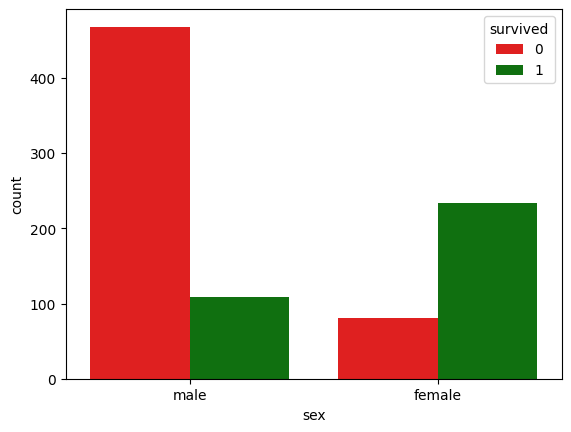

In [ ]:
# sns.countplot(x="sex", y="survived", data=df) --> 될 것 같으나 안됨
sns.countplot(data=df, x="sex", hue="survived")

# 1. 성별에 따른 생존율 분석

C:\Users\user\AppData\Local\Temp\ipykernel_10708\2954050576.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sex_survived,


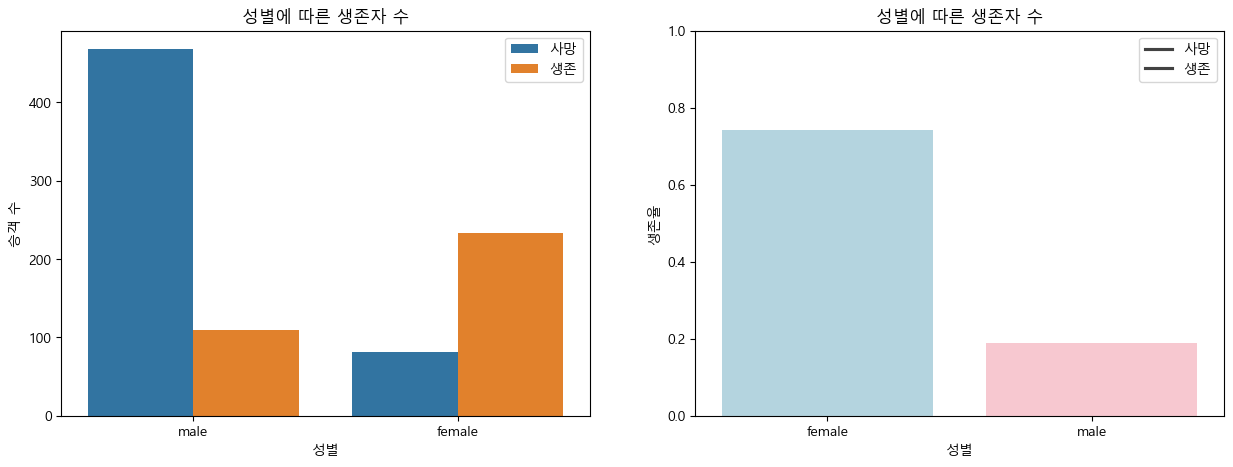

In [37]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="sex", hue="survived", ax=axes[0])
axes[0].set_title("성별에 따른 생존자 수")
axes[0].set_xlabel("성별")
axes[0].set_ylabel("승객 수")
axes[0].legend(labels=["사망","생존"])

# 성별 생존율(!)
## Group by : 집계함수
sex_survived = df.groupby("sex")["survived"].mean().reset_index()
sns.barplot(data=sex_survived,
            x="sex",
            y="survived",
            palette=["lightblue", "pink"],
            ax=axes[1])

axes[1].set_title("성별에 따른 생존자 수")
axes[1].set_xlabel("성별")
axes[1].set_ylabel("생존율")
axes[1].legend(labels=["사망","생존"])
axes[1].set_ylim(0,1)

plt.tight_layout
plt.show()

In [51]:
pd.crosstab(df["sex"], df["survived"])

survived,0,1
sex,,
female,81,233
male,468,109


# 2. 승객 등급에 따른 생존율(가정 검증)
- 등급별 생존자 수
- 등급별 생존율
- 댕급과 성별 교차표

C:\Users\user\AppData\Local\Temp\ipykernel_10708\2005969057.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sex_survived,
C:\Users\user\AppData\Local\Temp\ipykernel_10708\2005969057.py:12: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=sex_survived,


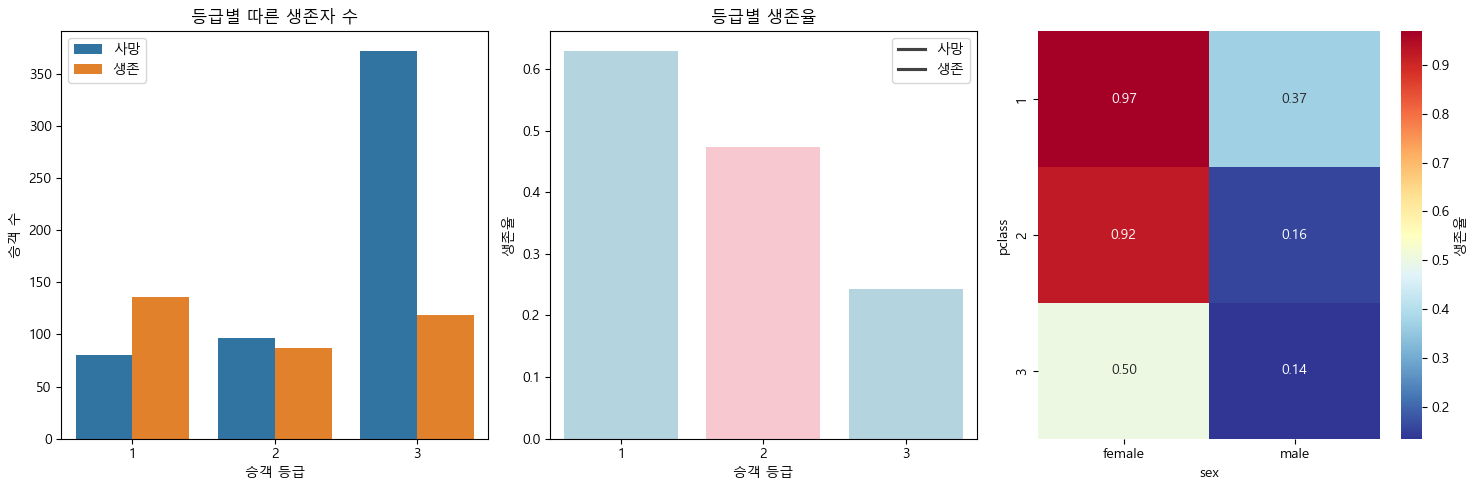

In [65]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# 등급별 생존자 수
sns.countplot(data=df, x="pclass", hue="survived", ax=axes[0])
axes[0].set_title("등급별 따른 생존자 수")
axes[0].set_xlabel("승객 등급")
axes[0].set_ylabel("승객 수")
axes[0].legend(labels=["사망","생존"])

# 생존율
sex_survived = df.groupby("pclass")["survived"].mean().reset_index()
sns.barplot(data=sex_survived,
            x="pclass",
            y="survived",
            palette=["lightblue", "pink"],
            ax=axes[1])

axes[1].set_title("등급별 생존율")
axes[1].set_xlabel("승객 등급")
axes[1].set_ylabel("생존율")
axes[1].legend(labels=["사망","생존"])

cross_tab = pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean")
sns.heatmap(cross_tab, 
            annot=True, 
            fmt=".2f", 
            cmap="RdYlBu_r", 
            cbar_kws={"label": "생존율"},
            ax=axes[2])
plt.tight_layout()
plt.show()

In [69]:
pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean")

sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [68]:
pd.crosstab(df["sex"], df["survived"], values=df["age"], aggfunc="mean")

survived,0,1
sex,,
female,26.023272,28.979263
male,31.175224,27.631705


# 3. 나이에 따른 생존자
- 성별과 나이
- 전체 나이 분포
- 그룹별
- 생존 여부에 따른 나이 분포

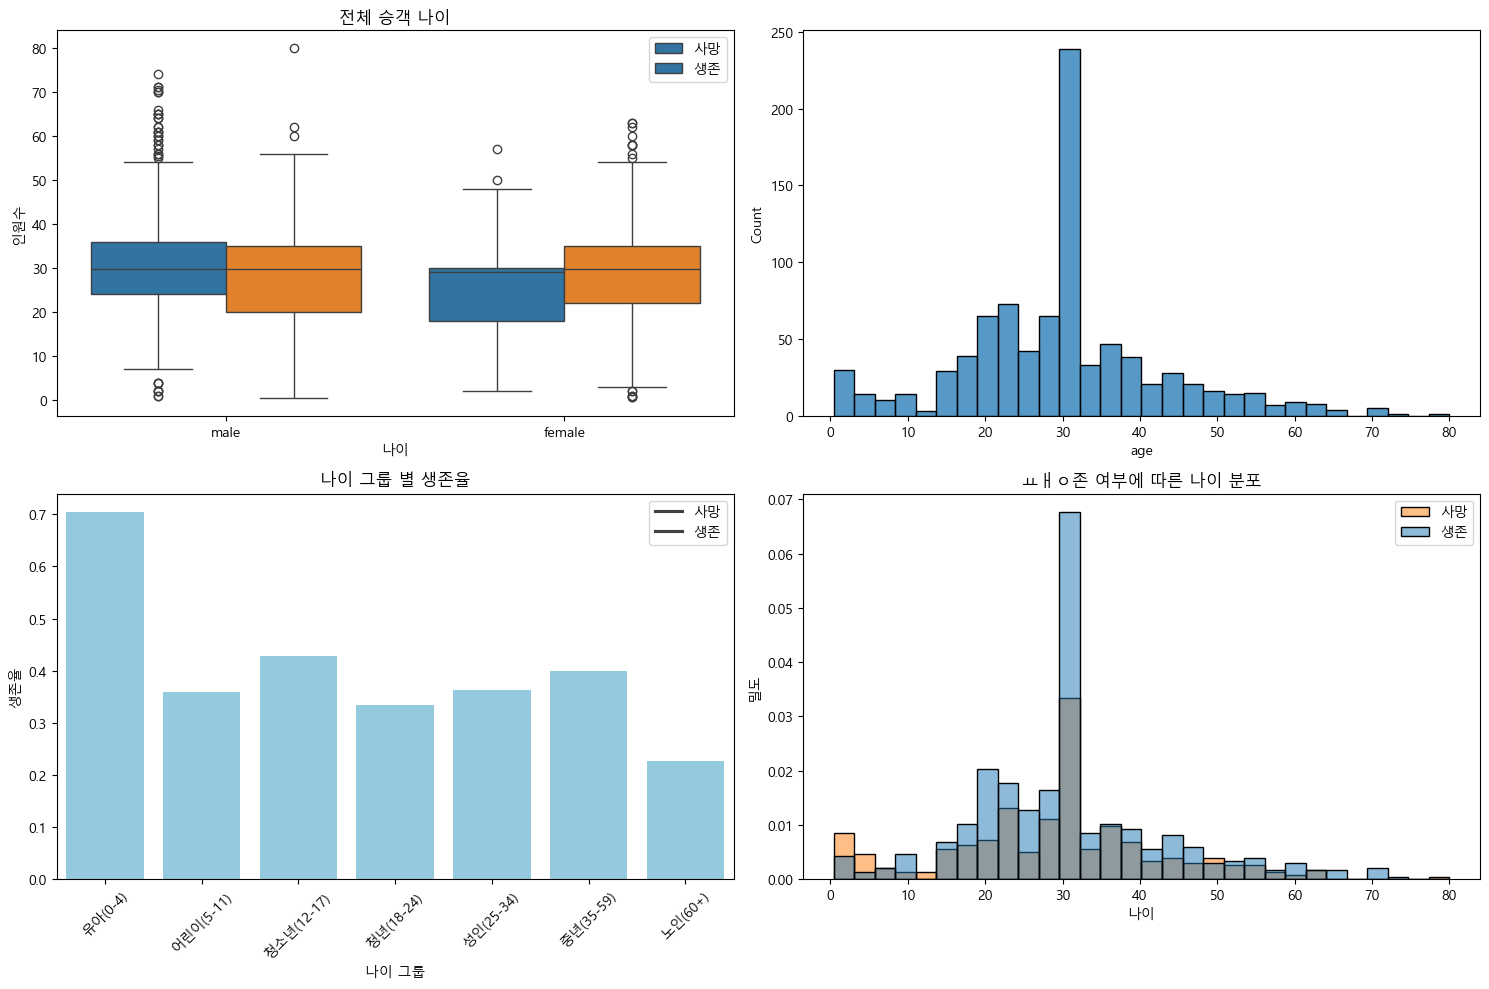

In [92]:
fir, axes = plt.subplots(2,2, figsize=(15,10))

sns.boxplot(data=df, x="sex", y="age", hue="survived" , ax=axes[0,0])
axes[0,0].set_title("성별과 나이에 따른 생존 현황")
axes[0,0].set_xlabel("성별")
axes[0,0].set_ylabel("나이")
axes[0,0].legend(labels=["사망","생존"])

sns.histplot(data=df, x="age", ax=axes[0,1])
axes[0,0].set_title("전체 승객 나이")
axes[0,0].set_xlabel("나이")
axes[0,0].set_ylabel("인원수")


# 유아(0-4)
# 어린이(5-11)
# 청소년(12-17)
# 청년(18-24)
# 성인(25-34)
# 중년(35-59)
# 노인(60+)
bins = [0, 5, 12, 18, 25, 35, 60, np.inf]
labels = ["유아(0-4)", "어린이(5-11)", "청소년(12-17)", "청년(18-24)", "성인(25-34)", "중년(35-59)", "노인(60+)"]

df["age_group"] = pd.cut(df["age"], bins, labels=labels)


# 생존율
age_group_survived = df.groupby("age_group", observed=True)["survived"].mean().reset_index()
sns.barplot(data=age_group_survived,
            x="age_group",
            y="survived",
            color="skyblue",
            ax=axes[1,0])
axes[1,0].set_title("나이 그룹 별 생존율")
axes[1,0].set_xlabel("나이 그룹")
axes[1,0].set_ylabel("생존율")
axes[1,0].tick_params(axis="x", rotation=45)
axes[1,0].legend(labels=["사망","생존"])


sns.histplot(data=df, x="age", hue="survived", stat="density" ,ax=axes[1,1])
axes[1,1].set_title("ㅛㅐㅇ존 여부에 따른 나이 분포")
axes[1,1].set_xlabel("나이")
axes[1,1].set_ylabel("밀도")
axes[1,1].legend(labels=["사망","생존"])

plt.tight_layout()
plt.show()

In [ ]:
fir, axes = plt.subplots(2,2, figsize=(15,10))

sns.boxplot(data=df, x="sex", y="age", hue="survived" , ax=axes[0,1])
axes[0,0].set_title("성별과 나이에 따른 생존 현황")
axes[0,0].set_xlabel("성별")
axes[0,0].set_ylabel("나이")
axes[0,0].legend(labels=["사망","생존"])

sns.histplot(data=df, x="age", ax=axes[0,1])
axes[0,0].set_title("전체 승객 나이")
axes[0,0].set_xlabel("나이")
axes[0,0].set_ylabel("인원수")

- 데이터 -> 전처리(EDA) -> 1. 보고서(상관계수 & 이해) -> 새로운 데이터 -> 1. 사람 / 2. 수학 / 3. 예측